In [1]:
from sklearn.model_selection import train_test_split #for splitting the data in train and test
from sklearn.preprocessing import MinMaxScaler #for various scaling methods
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score #for accuracy matrices
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score #for accuracy matrices

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [5]:
df = pd.read_csv('classification_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month,Target
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,0.0,1025,10,99,2016,3,0


In [6]:
df.shape

(155223, 19)

In [7]:
df.columns

Index(['density_per_km', 'latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month', 'Target'],
      dtype='object')

In [8]:
# Total no of duplicate rows
df.duplicated().sum()

79878

In [9]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

In [10]:
df.shape

(75345, 19)

## Feature Scaling

In [11]:
feature_scale = [feature for feature in df.columns if feature not in ['Target']]

scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Target']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

data.head()

,Target,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month
0,1,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.000000,0.602941,1.0,0.531429,0.333333,0.181818
1,0,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.000000,0.602941,1.0,0.531429,0.333333,0.181818
2,0,0.505636,0.196981,0.742734,0.611940,0.611940,0.0,0.619355,0.76,0.698113,0.285714,0.34,0.698925,0.000000,0.705882,1.0,0.274286,0.333333,0.181818
3,1,0.505636,0.196981,0.742734,0.611940,0.611940,0.0,0.619355,0.76,0.698113,0.285714,0.34,0.698925,0.000000,0.705882,1.0,0.274286,0.333333,0.181818
4,0,0.505636,0.196981,0.742734,0.611940,0.731343,0.0,0.432258,0.26,0.792453,0.175824,0.61,0.763441,0.097011,0.558824,0.8,0.291429,0.333333,0.272727


# Train Test split

In [12]:
X = data.drop('Target',axis=1)
y = data['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=10, stratify=y) #train test split in 50:50 ratio

In [13]:
X_train.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month
9747,0.002883,0.588673,0.563257,0.537313,0.597015,0.0,0.625806,0.34,0.698113,0.087912,0.47,0.849462,0.006155,0.529412,0.6,0.437143,0.333333,0.090909
26293,0.000128,0.565977,0.552531,0.626866,0.701493,0.0,0.554839,0.48,0.849057,0.054945,0.56,0.881720,0.118406,0.558824,0.7,0.742857,0.333333,0.363636
41021,0.004803,0.645345,0.577569,0.791045,0.850746,0.0,0.625806,0.81,0.924528,0.252747,0.18,0.623656,0.007327,0.470588,1.0,0.225714,0.333333,0.636364
12705,0.001296,0.579009,0.530510,0.671642,0.701493,0.0,0.625806,0.14,0.792453,0.065934,0.21,0.731183,0.027550,0.529412,0.9,0.600000,0.333333,0.181818
48883,0.000317,0.582719,0.525652,0.641791,0.656716,0.0,0.625806,0.02,0.754717,0.021978,0.33,0.698925,0.030481,0.544118,0.9,0.397143,0.333333,0.818182


# Random Forest

In [21]:
rf_classifier=RandomForestClassifier().fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [22]:
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[10014 10353]
 [10913  6393]]
0.43551084330953205
              precision    recall  f1-score   support

           0       0.48      0.49      0.49     20367
           1       0.38      0.37      0.38     17306

    accuracy                           0.44     37673
   macro avg       0.43      0.43      0.43     37673
weighted avg       0.43      0.44      0.43     37673



In [16]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=500,criterion='gini',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[12105  8262]
 [10533  6773]]
0.5011015846893
              precision    recall  f1-score   support

           0       0.53      0.59      0.56     20367
           1       0.45      0.39      0.42     17306

    accuracy                           0.50     37673
   macro avg       0.49      0.49      0.49     37673
weighted avg       0.50      0.50      0.50     37673



## Randomized Search Cv

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized models
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 144.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 272.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 14,
 'n_estimators': 2000}

In [ ]:
rf_randomcv

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[15498  4869]
 [10765  6541]]
Accuracy Score 0.5850078305417673
Classification report:               precision    recall  f1-score   support

           0       0.59      0.76      0.66     20367
           1       0.57      0.38      0.46     17306

    accuracy                           0.59     37673
   macro avg       0.58      0.57      0.56     37673
weighted avg       0.58      0.59      0.57     37673



## Model with best parameters

In [22]:
clf1=RandomForestClassifier(criterion='entropy',
                              max_depth=10,
                              max_features='auto',
                              min_samples_leaf=2,
                              min_samples_split=14,
                              n_estimators=2000)
clf1.fit(X_train,y_train)
prediction=clf1.predict(X_test)

In [23]:
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[15502  4865]
 [10736  6570]]
0.5858837894513312
              precision    recall  f1-score   support

           0       0.59      0.76      0.67     20367
           1       0.57      0.38      0.46     17306

    accuracy                           0.59     37673
   macro avg       0.58      0.57      0.56     37673
weighted avg       0.58      0.59      0.57     37673



In [18]:
clf2=RandomForestClassifier(criterion='entropy',
                              max_depth=5,
                              max_features='auto',
                              min_samples_leaf=2,
                              min_samples_split=14,
                              n_estimators=2000)
clf2.fit(X_train,y_train)
clf_pred=clf2.predict(X_test)
print(confusion_matrix(y_test,clf_pred))
print(accuracy_score(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

[[15813  4554]
 [10725  6581]]
0.5944310248719242
              precision    recall  f1-score   support

           0       0.60      0.78      0.67     20367
           1       0.59      0.38      0.46     17306

    accuracy                           0.59     37673
   macro avg       0.59      0.58      0.57     37673
weighted avg       0.59      0.59      0.58     37673



## Graphical Analysis

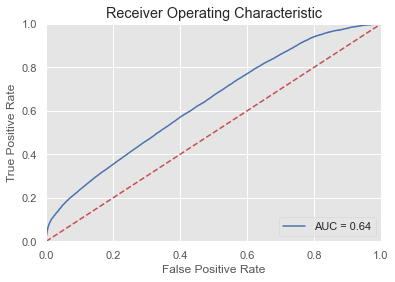

In [19]:
from sklearn.metrics import roc_curve, auc

probs               = clf2.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
print('Accuracy before tuning :',accuracy_score(y_test,prediction))
print()
print('Accuracy after tuning :',accuracy_score(y_test,clf_pred))

Accuracy before tuning : 0.43551084330953205

Accuracy after tuning : 0.5944310248719242
